In [1]:
from io import StringIO
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import datetime
import time
import feature_handler as handler

In [2]:
Stock_list = pd.read_csv('name.csv')['name']
date = pd.read_csv('date.csv')['date']
Stock = pd.read_csv('model.csv')
Stock = Stock.drop_duplicates()

In [3]:
day = 3
upper = 0.04
lower = -0.02
label_rise = "p" + str(day) + "_" + str(upper)
label_fall = "d" + str(day) + "_" + str(upper)
handler.rise_estimate(Stock, day , upper , lower)
handler.drop_estimate(Stock, day , upper , lower)

max() arg is an empty sequence 451521
min() arg is an empty sequence 451521


Klist = ['最高價','收盤價']

Stock['成交股數'].shift(+1)

i=0
while i<len(Klist):
    name=str(Klist[i])
    Stock[(name+"比率")]=""
    temp=Stock[name].shift(+1)
    Stock[(name+"比率")]=Stock[name]/(temp+0.001)
    i+=1
Stock

In [4]:
Stock.columns.values

array(['證券代號', '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差',
       '本益比', '融資買', '融資賣', '融資餘', '融卷買', '融卷賣', '融卷餘', 'ratio', '外資進出',
       '外資進', '外資出', '投信進出', '投信進', '投信出', '自營進出', '自營進', '自營出', '避險進出',
       '避險進', '避險出', '三大', 'date', '年前高', '季前高', 'MA5', 'MA10', 'MA20',
       'MA60', 'buy5', 'buy10', '外5', '外10', '投5', '投10', '自5', '三大5',
       '三大10', '日振幅', '波動率', 'MA交叉型態', 'K', 'D', 'KD交叉型態', 'KD交叉型態2',
       '漲跌', 'RSI5', 'MA5 slope', 'MA10 slope', 'MA60 slope',
       'ratio slope', 'margin slope', 'short slope', '三大 slope',
       '外資5 slope', '投信5 slope', '自營 slope', 'buy5 slope', 'buy10 slope',
       'MA5 acc', 'RSI5鈍化', '外5金', '投5金', '自5金', '融資金', '融卷金', '實紅棒',
       '紅棒天線', '實黑棒', '黑棒天線', '上避雷針', '下避雷針', '連漲跌', 'D5', 'D60', 'D三大',
       'D_upper_day', 'UD5', 'UD60', 'UD前高壓力', 'UD波段壓立', '均線糾結1', '均線糾結2',
       '三陽開泰', '突破前高', '均買量', 'R_散戶', 'pre5d0.1', 'pre5p0.1', 'pre3d0.05',
       'pre3p0.05', 'pre1d0.03', 'pre1p0.03', '均漲天數', '均跌天數', '超漲跌',
   

columns = Stock.columns
for l in range (len(Stock.columns)):
    if len(Stock[columns[l]].value_counts())<= 3:
        Rise = len(Stock[(Stock[columns[l]] > 0) & (Stock['p3_0.05'] ==1) ])
        Drop = len(Stock[(Stock[columns[l]] > 0) & (Stock['d3_0.05'] ==1) ])        
        print (columns[l] ," : " , Drop/(Rise+0.001) )


Stock[(Stock.突破前高 == 1) &(Stock.外資進 > 100000)][['外資進', '突破前高','p3_0.06']].hist()

In [5]:
Stock[label_fall].value_counts()

0    410239
1     41283
Name: d3_0.04, dtype: int64

In [30]:
Stock['突破前高'].value_counts()

0    451450
1        72
Name: 突破前高, dtype: int64

In [6]:
Stock[label_rise].value_counts()

0    405839
1     45683
Name: p3_0.04, dtype: int64

## 只選top50
list_s = pd.read_csv('150股票代號.csv').代號

test = Stock [Stock.證券代號.isin(list_s[0:49])]
test[labelp].value_counts()

In [31]:
test = Stock[Stock['成交金額'] > 100000000]
test = test[test['連漲跌'] > 0]
test = test[test['突破前高']==0]
test = test[test['融資餘'] > 1000]
test = test[test['融卷餘'] > 10]

test[label_rise].value_counts()


0    36674
1     5885
Name: p3_0.04, dtype: int64

In [32]:
test.columns

Index(['證券代號', '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差',
       '本益比',
       ...
       'pre5p0.1', 'pre3d0.05', 'pre3p0.05', 'pre1d0.03', 'pre1p0.03', '均漲天數',
       '均跌天數', '超漲跌', 'p3_0.04', 'd3_0.04'],
      dtype='object', length=106)

In [33]:
for_model = test.drop([ '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價',
        '漲跌價差', '融資買', '融資賣', '融資餘', '融卷買', '融卷賣', '融卷餘', '外資進出', '外資進', '外資出',  
        '三大', '外5', '投5', 'MA5', 'MA10', 'MA20', 'MA60', 'buy5', 'buy10','外10' , '投10', '自5', '三大5', '三大10',
       '投信進出', '投信進', '投信出', '自營進出', '自營進', '自營出', '避險進出', '避險進', '避險出','突破前高'
        ,'R_散戶','年前高', '季前高'],axis = 1)

In [34]:
for_model.columns

Index(['證券代號', '本益比', 'ratio', 'date', '日振幅', '波動率', 'MA交叉型態', 'K', 'D',
       'KD交叉型態', 'KD交叉型態2', '漲跌', 'RSI5', 'MA5 slope', 'MA10 slope',
       'MA60 slope', 'ratio slope', 'margin slope', 'short slope', '三大 slope',
       '外資5 slope', '投信5 slope', '自營 slope', 'buy5 slope', 'buy10 slope',
       'MA5 acc', 'RSI5鈍化', '外5金', '投5金', '自5金', '融資金', '融卷金', '實紅棒', '紅棒天線',
       '實黑棒', '黑棒天線', '上避雷針', '下避雷針', '連漲跌', 'D5', 'D60', 'D三大', 'D_upper_day',
       'UD5', 'UD60', 'UD前高壓力', 'UD波段壓立', '均線糾結1', '均線糾結2', '三陽開泰', '均買量',
       'pre5d0.1', 'pre5p0.1', 'pre3d0.05', 'pre3p0.05', 'pre1d0.03',
       'pre1p0.03', '均漲天數', '均跌天數', '超漲跌', 'p3_0.04', 'd3_0.04'],
      dtype='object')

In [35]:
model = for_model[for_model['date'] >  date [len(date)-(70)]]
#normal = normal[normal[labelp] == 0]

#detect = for_model[for_model[labelp] == 1]
#detect = detect[for_model['date'] >  date [len(date)-(70)]]
#model = detect.append(normal)

In [36]:
model[label_rise].value_counts()

0    33027
1     5426
Name: p3_0.04, dtype: int64

In [37]:
model[label_fall].value_counts()

0    32986
1     5467
Name: d3_0.04, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
flag = True
cost =  model[label_rise].value_counts()[0] /  model[label_rise].value_counts()[1]

In [39]:
K = 0
interval = 1
t = model[model['date'] <= date [K]]

trainp = t [t['date'] < date [K+interval] ]
testp = t [t['date'] >= date [K+interval] ]
#ros = RandomOverSampler(random_state42)

X_train = trainp.drop(['date','證券代號', label_rise,label_fall ],axis = 1)
y_train = trainp[label_fall]

X_test = testp.drop(['date', '證券代號',label_rise,label_fall],axis = 1)
y_test = testp[label_fall]

#X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
#ros = RandomOverSampler(random_state = 40)

#X_train, y_train = ros.fit_resample(X_train, y_train)


xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=cost,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)
xgbc.fit(X_train,y_train)
y_test_predp = xgbc.predict(X_test)
y_train_predp = xgbc.predict(X_train)


In [40]:
confusion_matrix( y_train ,y_train_predp)

array([[29093,  3659],
       [  101,  5309]], dtype=int64)

In [41]:
threshold = 0.6
predicted_proba = xgbc.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
confusion_matrix(y_test, predicted)

array([[219,  15],
       [ 54,   3]], dtype=int64)

view = X_test [predicted == 1]

view ['true'] = y_test[predicted == 1]

view.to_excel('QQmymoney.xlsx', index = False)

In [42]:
flag = True

In [43]:
if (flag) :
    t = 0
    flag = False
    d_list = []
    s_list = []
    p_list = []

In [44]:
for i in range(len(predicted)):
    if predicted[i] == 1 :
        d_list.append(int(testp['date'][i:i+1].squeeze()))
        s_list.append(int( testp['證券代號'][i:i+1].squeeze()))
        p_list.append(predicted_proba [:,1][i])
        
        #print (i ,testp['date'][i:i+1].squeeze() , " : ", int( testp['證券代號'][i:i+1].squeeze()) ,'  ', predicted_proba [:,1][i])

selected = pd.DataFrame()
selected['date'] = d_list
selected['代號'] = s_list
selected['score'] = p_list



In [45]:
selected.sort_values(by=['date','score'] , ascending=False, axis =0 , inplace=True)

selected[0:20]

,date,代號,score
13,20210421,3014,0.778789
16,20210421,6120,0.697147
1,20210421,2027,0.690832
11,20210421,2615,0.678594
17,20210421,8261,0.668744
14,20210421,3694,0.667291
10,20210421,2606,0.646285
8,20210421,2509,0.642557
3,20210421,2031,0.620775
4,20210421,2338,0.607384


In [46]:
selecte2 = selected[selected.score > 0.6]

In [47]:
selecte2.代號.value_counts()[0:20]

2031    2
3014    2
2606    2
2458    1
2615    1
4912    1
3694    1
2509    1
2027    1
2442    1
1609    1
6120    1
8261    1
2436    1
2338    1
Name: 代號, dtype: int64

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

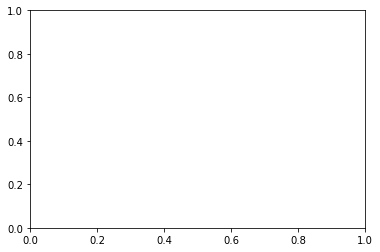

In [36]:
from xgboost import plot_tree
plot_tree(xgbc)
plt.show()

In [31]:
feature=pd.DataFrame()
feature['name'] = X_train.columns
feature['score'] = xgbc.feature_importances_

feature.sort_values(by=['score'] , ascending=False, axis =0 , inplace=True)

feature[0:50]

,name,score
3,波動率,0.043872
52,pre3p0.05,0.031303
44,UD波段壓立,0.027438
43,UD前高壓力,0.025117
2,日振幅,0.023887
28,融資金,0.023096
38,D60,0.021102
53,pre1d0.03,0.020885
56,均跌天數,0.020581
42,UD60,0.020006


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch

In [ ]:
import torch.utils.data as data
import io
import imageio
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from tqdm import tqdm_notebook as tqdm #pip install tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np
import os

In [ ]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [ ]:
class network(nn.Module):
    def __init__(self):
        super(network,self).__init__()
        self.L1 = nn.Linear(58,30)
        self.L2 = nn.Linear(30,18)
        self.L3 = nn.Linear(18,10)
        self.L4 = nn.Linear(10,7)
        self.L5 = nn.Linear(7,4)
        self.output = nn.Linear(4,2)
    def forward(self , x):
        x = F.relu(self.L1(x))
        x = F.relu(self.L2(x))
        x = F.relu(self.L3(x))
        x = F.relu(self.L4(x))
        x = F.relu(self.L5(x))
        x = self.output(x)
        return x

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print(sorted(Counter(y_train).items()))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_train = X_train_std 

sc.fit(X_test)
X_valid_std = sc.transform(X_test)
X_valid = X_valid_std

In [ ]:
X_train.shape,y_train.shape

In [ ]:
tensor_x = torch.from_numpy(X_train)
tensor_y = torch.from_numpy(y_train.to_numpy())
tensor_y = torch.squeeze(tensor_y)
tensor_x_test = torch.from_numpy(X_valid)
tensor_y_test = torch.from_numpy(y_test.to_numpy())
tensor_y_test = torch.squeeze(tensor_y_test)

In [ ]:
#trans = transforms.Compose([transforms.ToTensor()]) 
#train_set = dset.MNIST(root='.', train=True, download=True ,transform=trans)
#test_set = dset.MNIST(root='.', train=False,transform=trans)
train_set = data.TensorDataset(tensor_x,tensor_y)
test_set = data.TensorDataset(tensor_x_test,tensor_y_test)
train_dataset = data.DataLoader(dataset =  train_set,batch_size=100,shuffle=True)
test_dataset = data.DataLoader(dataset = test_set , batch_size=100)

In [ ]:
use_cuda = torch.cuda.is_available()
use_cuda

In [ ]:
use_cuda = torch.cuda.is_available()
net = network()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters())
loss_history = []
if use_cuda:
    net = net.cuda()
for e in tqdm(range(30)):
    epoch_loss_sum = 0
    for x , y in tqdm(train_dataset):
        if use_cuda:
            x = x.cuda()
            y = y.cuda()
        batch_size = x.shape[0]
        x = x.view(batch_size,-1)
        net_out = net(x.float())
        loss = loss_fn(net_out , y)
        epoch_loss_sum += float(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_history.append(epoch_loss_sum)

In [ ]:
correct_count = 0
total_testing = len(test_set)
for x,y in test_dataset:
    if use_cuda:
        x = x.cuda()
        y = y.cuda().detach()
    batch_size = x.shape[0]
    x = x.view(batch_size,-1)
    output = net(x.float()).max(1)[1] #output出來是一個向量
    correct_count += torch.sum(output==y).item()
    #print(torch.sum(output==y))
    #print("output = {}".format(output))
    #print("y = {}".format(y))
    #print("======")
#print(correct_count, total_testing)
#correct_count = correct_count
print('accuracy rate',correct_count/total_testing)

In [ ]:
y_pred = net(tensor_x_test.float()).max(1)[1]
y_prediction = y_pred.detach().cpu().numpy() 
y_prediction


In [ ]:
y_test2 = tensor_y_test.numpy()

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ")
confusion_matrix(y_test,y_prediction)

In [ ]:
y_test.value_counts()